# Logistic Regression: A Closer Look
Previously we saw how to _run_ logistic regression to create a model.  Now let's look at _how_ that works.

## Intuition
Broadly speaking, logistic regression takes linear regression and applies the "logistic function" to the outputs to map them into the fixed range $(0,1)$ to provide a probability that the sample is in the positive class.

For training, we will also change the cost function to be more appropriate feedback for a binary classification problem.

## The Logistic Function

The logistic function is an _s-curve_ that maps the entire domain of $x$ into the range $(0,1)$.  

$$p(X) = \frac{e^{\beta_0+\beta_1X}}{1+e^{\beta_0+\beta_1X}}$$

This is closely related to the sigmoid function:

$$ S(x) = \frac{1}{1+e^{-x}}$$

The sigmoid is a special case of the logistic function.

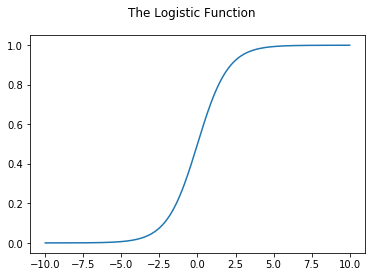

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

xs = np.linspace(-10, 10, 1000)
ys = np.exp(xs)/(1 + np.exp(xs))

plt.plot(xs,ys)
plt.suptitle('The Logistic Function')
plt.show()

#  Why not just Linear Regression?

![logistic-probability.png](logistic-probability.png)

Note that in the linear case, we don't accurately capture the transition between the probabilities of each class as we do after the logistic transform.

The application of the logistic function explains the gradation that we saw in the visualization of the decision boundary of the `LogisticRegression` classifier in previous lectures.

##  Cost Function:  Cross-Entropy

Cross-entropy loss, or log loss, measures the performance of a classification model that outputs a probability.

![cross-entropy-formula.png](cross-entropy-formula.png)

Note that because we multiply one term by $y^{(i)}$ and the companion term by $1-y^{(i)}$, we end up with a different term dominating the cost for high probability predictions than low ones.

Cross-entropy loss increases as the predicted probability diverges from the actual label. That is, the worse it gets, the higher the penalty.

![cross-entropy-graph.png](cross-entropy-graph.png)

# Sidebar:  Graphing functions in a general way
We can actually generalize this nicely to plot any function of x in 2D:

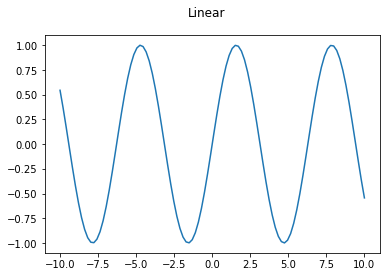

<module 'matplotlib.pyplot' from '/Users/jmk/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [2]:
def plot(func, xrange=[-10, 10], steps=100, title=None):
    '''Takes a function over a numpy sequence and plots the output.'''
    xs = np.linspace(xrange[0], xrange[1], steps)
    ys = func(xs)
    plt.plot(xs,ys)
    if title:
        plt.suptitle(title)
    plt.show()
    return plt

plot(lambda x: np.sin(x), title="Linear")

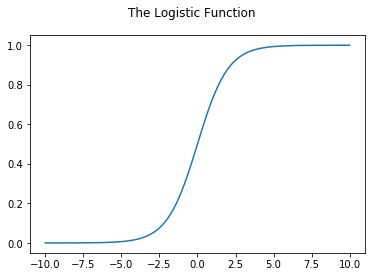

<module 'matplotlib.pyplot' from '/Users/jmk/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [3]:
plot(lambda xs: np.exp(xs)/(1 + np.exp(xs)), title='The Logistic Function')

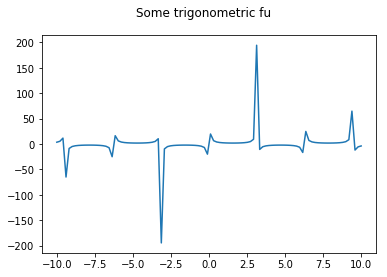

<module 'matplotlib.pyplot' from '/Users/jmk/anaconda/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [4]:
plot(lambda x: 1*2/np.sin(x), title='Some trigonometric fu')

In [15]:
#  Re-add in classification code here
#  Some boilerplate for visualization...
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

from pandas import DataFrame
from sklearn.datasets import make_blobs

#  Note: Make the cluster_std parameter > 1 to make the blobs less distinct
#  This makes the classification problem harder and shows how the scores change.
X, y = make_blobs(n_features=2, centers=2,  cluster_std=9) 
df = DataFrame(X)

#  Add the target variable into the dataframe (this let's seaborn color based on it)
df['target'] = y

#  Name the columns for sanity's sake...
df.columns = ['x', 'y', 'target']

#  Now we build the model.
from sklearn.linear_model import LogisticRegression

#  Let's create a logistic regression classifier 
#  (we'll talk about the details of this later)
#
#  In sklearn parlance, this is an Estimator and can be .fit()
#  to data and can .predict() on data.
clf = LogisticRegression()
clf.fit(X, y)

#  Now we're done training.
new_examples = [
    [-4, 10],
    [10, -4]
]

#  Let's see where we predict these new samples lie.
clf.predict(new_examples)


xx, yy = np.mgrid[-30:30:.1, -15:25:.1]
grid = np.c_[xx.ravel(), yy.ravel()]

#  Calculate the probability of class 1 for each sample
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

#  Use this version to show just the classes, not the probability.
#probs = clf.predict(grid).reshape(xx.shape)

[(-15, 25), Text(0,0.5,'$X_2$'), (-30, 30), Text(0.5,0,'$X_1$'), None]

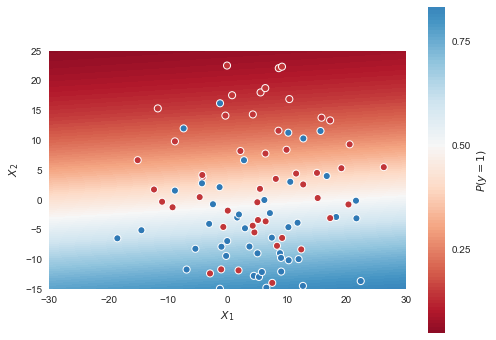

In [16]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 100, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[:,0], X[:, 1], c=y[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-30, 30), ylim=(-15, 25),
       xlabel="$X_1$", ylabel="$X_2$")